## Classification Example
### from Geron, 2nd Edition, chapter 10

In [1]:
import sys
import tensorflow as tf
from tensorflow import keras

sys.version

2023-07-30 10:46:24.441404: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'3.10.11 (v3.10.11:7d4cc5aa85, Apr  4 2023, 19:05:19) [Clang 13.0.0 (clang-1300.0.29.30)]'

In [2]:
tf.__version__

'2.11.1'

In [3]:
keras.__version__

'2.11.0'

In [4]:
tf.random.set_seed(1234)

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2023-07-30 10:46:27.899160: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [8]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7183 - accuracy: 0.7607 - val_loss: 0.5147 - val_accuracy: 0.8312
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4910 - accuracy: 0.8297 - val_loss: 0.4545 - val_accuracy: 0.8502
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4471 - accuracy: 0.8441 - val_loss: 0.4436 - val_accuracy: 0.8396
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4193 - accuracy: 0.8536 - val_loss: 0.4023 - val_accuracy: 0.8602
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3991 - accuracy: 0.8597 - val_loss: 0.4018 - val_accuracy: 0.8606
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3833 - accuracy: 0.8664 - val_loss: 0.3894 - val_accuracy: 0.8632
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3706 - accuracy: 0.8693 - val_loss: 0.3751 - val_accuracy:

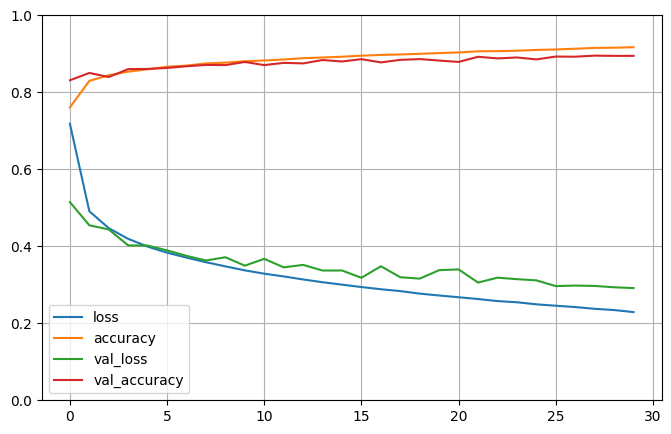

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.8848


[0.3242204189300537, 0.8848000168800354]

In [11]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 90ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)